# Lab 06 - Normal vs. Transverse Mapping Prescription
Note: Assume the Earth is sphere and the radius of the Earth is 6371 km

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
R=6371000 #meter

## Functions from previous lab

In [101]:
# converting ddmmss to degress
def get_degree(dd,mm,ss):
    dd= float(dd)
    mm= float(mm)
    ss=float(ss)
    degree=dd+mm/60+ss/3600
    return degree
# converting to x y z
def get_xyz(R,h,lon,lat):
    h=float(h)
    lat=np.deg2rad(get_degree(lat[0],lat[1],lat[2]))
    lon=np.deg2rad(get_degree(lon[0],lon[1],lon[2]))
    x=(R+h)*np.cos(lat)*np.cos(lon)
    y=(R+h)*np.cos(lat)*np.sin(lon)
    z=(R+h)*np.sin(lat)
    return x,y,z
def deg2xyz(R,h,lat,lon):
    lon2=np.deg2rad(lon)
    lat2=np.deg2rad(lat)
    x=(R+h)*np.cos(lat2)*np.cos(lon2)
    y=(R+h)*np.cos(lat2)*np.sin(lon2)
    z=(R+h)*np.sin(lat2)
    return x,y,z
def xyz2deg(x,y,z):
    #takes list xyz (single coord)
    r = np.sqrt(x**2 + y**2 + z**2)
    rr=np.sqrt(x**2+y**2)
    h=r-R
    lambdaa=np.arctan2(y,x)*180/np.pi
    psi=np.arctan2(z,rr)*180/np.pi
    return [h,lambdaa,psi]
def get_dms(dd):
    split_dd = math.modf(dd)
    dd= int(split_dd[1])
    mm= int(math.modf(split_dd[0] * 60)[1])
    ss= round(math.modf(split_dd[0] * 60)[0] * 60,5)
    return dd,mm,ss
def get_jocobian(lambdaa,psi,h):
    #psi=lat
    #lambda=lon
    psi=np.deg2rad(get_degree(psi[0],psi[1],psi[2]))
    lambdaa=np.deg2rad(get_degree(lambdaa[0],lambdaa[1],lambdaa[2]))
    J=np.array([
        [-(R+h)*np.cos(psi)*np.sin(lambdaa),-(R+h)*np.sin(psi)*np.cos(lambdaa),np.cos(psi)*np.cos(lambdaa)],
       [(R+h)*np.cos(psi)*np.cos(lambdaa),-(R+h)*np.sin(psi)*np.sin(lambdaa),np.cos(psi)*np.sin(lambdaa)],
      [0,(R+h)*np.cos(psi),np.sin(psi)]])
    return J


## Q1. Plot grid line, coast line, and your PoB using normal aspect. You need to provide 3 maps (PC, SF, MC) here. Use only points that are between -80° and 80° latitude for normal MC mapping.

In [4]:
poi=dict()
header=['Point_Name', 'Lon(dd)', 'Lon(mm)', 'Lon(ss)', 'Lat(dd)', 'Lat(mm)', 'Lat(ss)', 'Height (m)']
n=0
with open('poi.csv','r') as f:
    csv_reader=csv.reader(f,delimiter=',')
    for i in csv_reader:
        for j in range(8):
            if n ==0:
                poi[header[j]]=[]
            else:
                poi[header[j]].append(i[j])
        n=1
# convert ddmmss of poi into degree
poi['lon (deg)']=[]
poi['lat (deg)']=[]
for i in range(9):
    poi['lon (deg)'].append(get_degree(poi['Lon(dd)'][i],poi['Lon(mm)'][i],poi['Lon(ss)'][i]))
    poi['lat (deg)'].append(get_degree(poi['Lat(dd)'][i],poi['Lat(mm)'][i],poi['Lat(ss)'][i]))

### PC

In [5]:
# Define Xm Ym in sinusoidal mapping system
poi['Xm_pc']=[]
poi['Ym_pc']=[]
for i in range(9):
    poi['Xm_pc'].append(np.cos(np.deg2rad(poi['lat (deg)'][i]))*poi['lon (deg)'][i])
    poi['Ym_pc'].append(poi['lat (deg)'][i])
# read coastline
coastline_pc=dict()
coastline_pc['lon']=[]
coastline_pc['lat']=[]
with open('coastline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        coastline_pc['lat'].append(float(i[0].split()[1])/60)
        coastline_pc['lon'].append(float(i[0].split()[2])/60)
grid_pc=dict()
grid_pc['gridx']=[]
grid_pc['gridy']=[]
with open('gridline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        grid_pc['gridy'].append(float(i[0].split()[1])/60)
        grid_pc['gridx'].append(float(i[0].split()[2])/60)

### SF

In [6]:
# read coastline and convert lon/lat to Xm, Yn
coastline_sf=dict()
coastline_sf['lon']=[]
coastline_sf['lat']=[]
coastline_sf['Xm']=[]
coastline_sf['Ym']=[]
with open('coastline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        coastline_sf['lat'].append(float(i[0].split()[1])/60)
        coastline_sf['lon'].append(float(i[0].split()[2])/60)
coastline_sf['Xm']=np.cos(np.deg2rad(coastline_sf['lat']))*coastline_sf['lon']
coastline_sf['Ym']=coastline_sf['lat']
grid_sf=dict()
grid_sf['lat']=[]
grid_sf['lon']=[]
with open('gridline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        grid_sf['lat'].append(float(i[0].split()[1])/60)
        grid_sf['lon'].append(float(i[0].split()[2])/60)
grid_sf['Xm']=np.cos(np.deg2rad(grid_sf['lat']))*grid_sf['lon']
grid_sf['Ym']=grid_sf['lat']
# Define Xm Ym in sinusoidal mapping system
poi['Xm_sf']=[]
poi['Ym_sf']=[]
for i in range(9):
    poi['Xm_sf'].append(np.cos(np.deg2rad(poi['lat (deg)'][i]))*poi['lon (deg)'][i])
    poi['Ym_sf'].append(poi['lat (deg)'][i])

### Mercator mapping
- Xm = lambda
- Ym = ln[tan(psi/2+pi/4)]

In [7]:
from numpy import log as ln
# read coastline and convert lon/lat to Xm, Yn
coastline_m=dict()
coastline_m['lon']=[]
coastline_m['lat']=[]
coastline_m['Xm']=[]
coastline_m['Ym']=[]
with open('coastline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        coastline_m['lat'].append(float(i[0].split()[1])/60)
        coastline_m['lon'].append(float(i[0].split()[2])/60)
coastline_m['Xm']=coastline_m['lon']
coastline_m['Ym']=[]
for i in range(len(coastline_m['lat'])):
    angle_temp=np.deg2rad(coastline_m['lat'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    coastline_m['Ym'].append(Ymm)
# Grid
grid_m=dict()
grid_m['lat']=[]
grid_m['lon']=[]
with open('gridline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        grid_m['lat'].append(float(i[0].split()[1])/60)
        grid_m['lon'].append(float(i[0].split()[2])/60)
grid_m['Xm']=grid_m['lon']
grid_m['Ym']=[]
for i in range(len(grid_m['lat'])):
    angle_temp=np.deg2rad(grid_m['lat'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    grid_m['Ym'].append(Ymm)
# compute Xm Ym for poi
poi['Xm_m']=poi['lon (deg)']
poi['Ym_m']=[]
for i in range(9):
    angle_temp=np.deg2rad(poi['lat (deg)'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    poi['Ym_m'].append(Ymm)

<ipython-input-7-b14f03eb25cb>:32: RuntimeWarning: divide by zero encountered in log
  Ymm=ln(np.tan(angle_temp+np.pi/4))


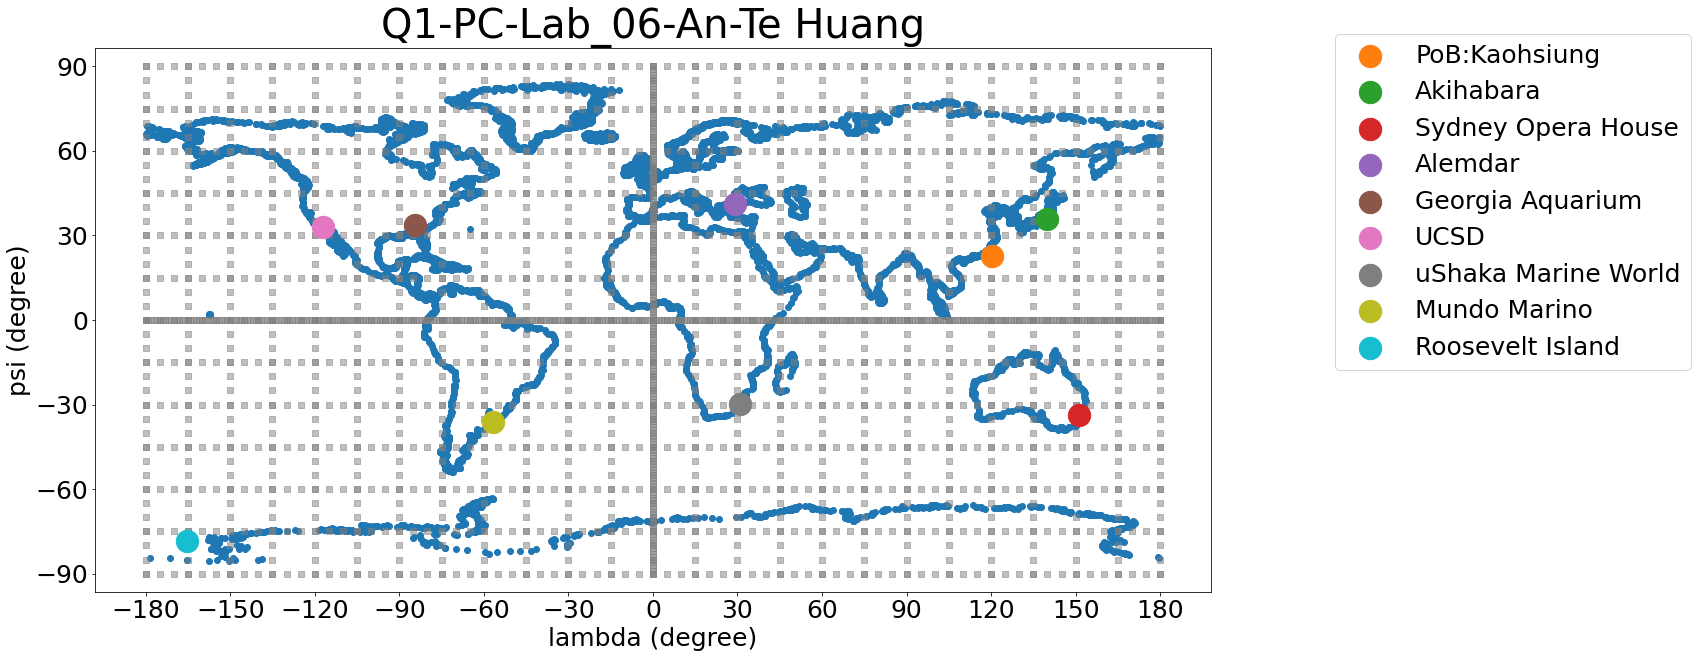

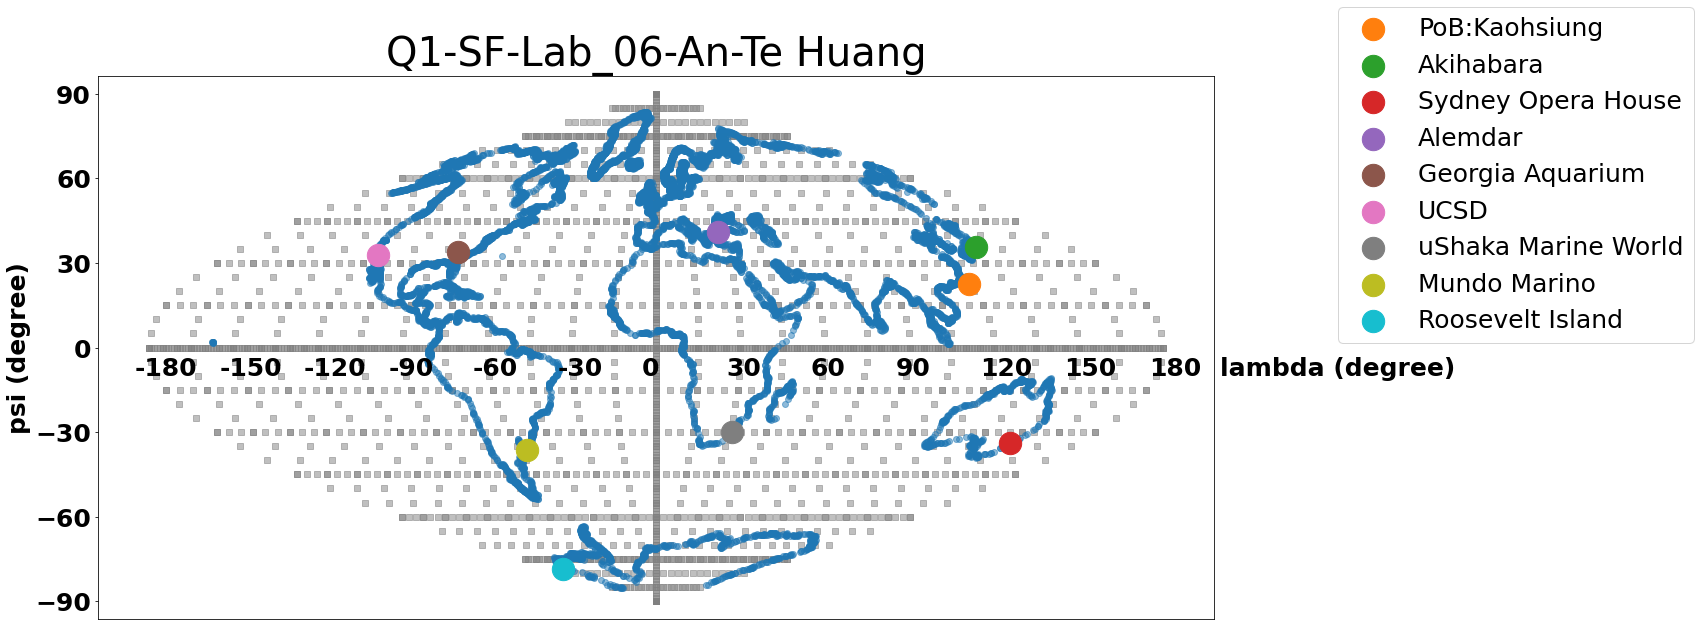

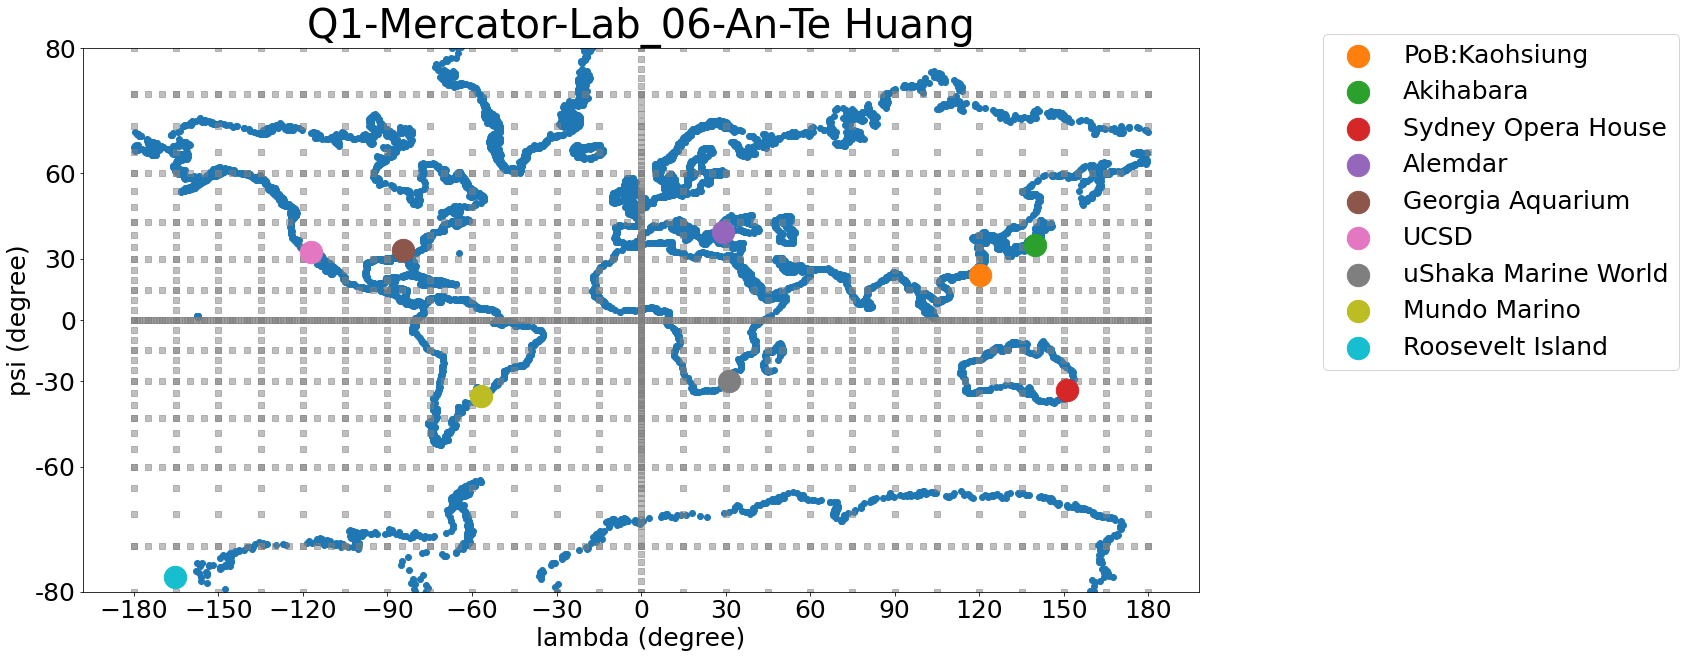

In [8]:

# plot Plate Carree
f1=plt.figure(figsize=(20,10))
plt.axis('equal')
plt.title('Q1-PC-Lab_06-An-Te Huang',fontsize=40)
plt.xlabel('lambda (degree)',fontsize=25)
plt.yticks([-90,-60,-30,0,30,60,90],fontsize=25)
plt.xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],fontsize=25)
plt.ylabel('psi (degree)',fontsize=25)
plt.scatter(coastline_pc['lon'],coastline_pc['lat'])
plt.scatter(grid_pc['gridx'],grid_pc['gridy'],marker=',',color='gray',alpha=0.5)
for i in range(9):
    plt.scatter(poi['lon (deg)'][i],poi['lat (deg)'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()

## plot SF
f2=plt.figure(figsize=(20,10))
plt.axis('equal')
plt.title('Q1-SF-Lab_06-An-Te Huang',fontsize=40)
# plt.xlabel('lambda (degree)',fontsize=25)
plt.xticks([])
Xw=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
Yw=[0 for i in range(len(Xw))]
for i in range(len(Xw)):
               plt.text(Xw[i]-5,Yw[i]-10,int(Xw[i]), fontsize=25,fontweight='bold')
plt.text(200,-10,'lambda (degree)', fontsize=25,fontweight='bold')
plt.yticks([-90,-60,-30,0,30,60,90],fontsize=25,fontweight='bold')
plt.ylabel('psi (degree)',fontsize=25,fontweight='bold')
plt.scatter(grid_sf['Xm'],grid_sf['Ym'],marker=',',color='gray',alpha=0.5)
plt.scatter(coastline_sf['Xm'],coastline_sf['Ym'], alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_sf'][i],poi['Ym_sf'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.15],fontsize=25)
plt.show()
# M
#compute q when psi =-80 and 80
ql=ln(np.tan(np.deg2rad(-80)/2+np.pi/4))
qt=ln(np.tan(np.deg2rad(80)/2+np.pi/4))
yticks=[-80,-60,-30,0,30,60,80]
labels=(-80,-60,-30,0,30,60,80)
qticks=[]
for i in range(7):
    angle_temp=np.deg2rad(yticks[i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    qticks.append(Ymm)
f3=plt.figure(figsize=(20,10))
# plt.axis('equal')
plt.title('Q1-Mercator-Lab_06-An-Te Huang',fontsize=40)
plt.ylim(ql,qt)
plt.rcParams['figure.figsize'] = [15, 18]

plt.xlabel('lambda (degree)',fontsize=25)
plt.yticks(qticks,labels,fontsize=25)
plt.xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],fontsize=25)
plt.ylabel('psi (degree)',fontsize=25)
plt.scatter(coastline_m['Xm'],coastline_m['Ym'])
plt.scatter(grid_m['Xm'],grid_m['Ym'],marker=',',color='gray',alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_m'][i],poi['Ym_m'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()

## Q2 Describe in detail the mathematics you used to “make” your PoB meridian to the new equator.
$\begin{bmatrix} x'\\y'\\z'\end{bmatrix}=R_2(\lambda) R_1(\pi/2)\ \begin{bmatrix} x\\y\\z\end{bmatrix}$    
where x',y',z' are the coordinates after transformation;    
$R_2(\lambda)=\begin{bmatrix} \cos(\lambda)&0&-\sin(\lambda)\\0&1&0\\\sin(\lambda)&0&\cos(\lambda)\end{bmatrix}$;
$R_1(\pi/2)=\begin{bmatrix} 1&0&0\\0&\cos(\pi/2)&\sin(\pi/2)\\0&-\sin(\pi/2)&\cos(\pi/2)\end{bmatrix}=\begin{bmatrix} 1&0&0\\0&0&1\\0&-1&0\end{bmatrix}$;    
    x,y,z are the coordinates before transformation


## Q3 Plot grid line, coast line, and your PoB using transverse aspect. You need to provide another 3 maps (PC, SF, M) here. Use only points that are between -80° and 80° latitude (after the transformation) for transverse MC mapping.
- z is not used in mapping
- Workflow: convert $\lambda,\psi, height$ to xyz -> convert xyz to x'y'z'-> convert x'y'z' to $\lambda',\psi',height'$-> convert $\lambda',\psi',height'$ to mapping

### Convert x,y,z to x',y',z' , *assuming the height for coastline and grid is 0*

In [106]:
# Get xyz for poi
poi['x']=[]
poi['y']=[]
poi['z']=[]
for i in range(9):
    poi['x'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[0])
    poi['y'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[1])
    poi['z'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[2])
# Get xyz for coastline and grid
coastline=dict()
coastline['lon']=coastline_pc['lon']
coastline['lat']=coastline_pc['lat']
coastline['x']=[]
coastline['y']=[]
coastline['z']=[]
for i in range(len(coastline_pc['lon'])):
    coastline['x'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[0])
    coastline['y'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[1])
    coastline['z'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[2])
# Get xyz for grid line
grid=dict()
grid['lon']=grid_sf['lon']
grid['lat']=grid_sf['lat']
grid['x']=[]
grid['y']=[]
grid['z']=[]
for i in range(len(grid['lon'])):
    grid['x'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[0])
    grid['y'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[1])
    grid['z'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[2])

In [90]:
def transverse(lambdaa,x,y,z):
    lambdaa=np.deg2rad(lambdaa)
    R1=np.array([[1,0,0],[0,0,1],[0,-1,0]])
    R2=np.array([[np.cos(lambdaa),0,-np.sin(lambdaa)],[0,1,0],[np.sin(lambdaa),0,np.cos(lambdaa)]])
    R3=np.array([[np.cos(lambdaa),np.sin(lambdaa),0],[0,0,1],[np.sin(lambdaa),-np.cos(lambdaa),0]])
    m=np.array([[x],[y],[z]])
#     t=[[np.cos(lambdaa)*x+np.sin(lambdaa)*y],[z],[np.sin(lambdaa)*x-np.cos(lambdaa)*y]]
    t=R3.dot(m)
#     t=R2.dot(R1).dot(m)
    return t
# get x',y',z' for poi
poi['x2']=[]
poi['y2']=[]
poi['z2']=[]
for i in range(9):
    poi['x2'].append(transverse(poi['lon (deg)'][i],poi['x'][i],poi['y'][i],poi['z'][i])[0][0])
    poi['y2'].append(transverse(poi['lon (deg)'][i],poi['x'][i],poi['y'][i],poi['z'][i])[1][0])
    poi['z2'].append(transverse(poi['lon (deg)'][i],poi['x'][i],poi['y'][i],poi['z'][i])[2][0])
# get x',y',z' for coastline
coastline['x2']=[]
coastline['y2']=[]
coastline['z2']=[]
for i in range(len(coastline['x'])):
    coastline['x2'].append(transverse(coastline['lon'][i],coastline['x'][i],coastline['y'][i],coastline['z'][i])[0][0])
    coastline['y2'].append(transverse(coastline['lon'][i],coastline['x'][i],coastline['y'][i],coastline['z'][i])[1][0])
    coastline['z2'].append(transverse(coastline['lon'][i],coastline['x'][i],coastline['y'][i],coastline['z'][i])[2][0])

# get x',y',z' for grid line
grid['x2']=[]
grid['y2']=[]
grid['z2']=[]
for i in range(len(grid['x'])):
    grid['x2'].append(transverse(grid['lon'][i],grid['x'][i],grid['y'][i],grid['z'][i])[0][0])
    grid['y2'].append(transverse(grid['lon'][i],grid['x'][i],grid['y'][i],grid['z'][i])[1][0])
    grid['z2'].append(transverse(grid['lon'][i],grid['x'][i],grid['y'][i],grid['z'][i])[2][0])

In [97]:
print(poi['lon (deg)'])

[120.3561111111111, 139.7752777777778, 151.21499999999997, 28.97833333333333, -84.39055555555557, -117.23388888888888, 31.045555555555556, -56.749722222222225, -165.42083333333332]


In [92]:
# get lambda', psi', h' for poi
poi['lambda2']=[]
poi['psi2']=[]
poi['h2']=[]
for i in range(9):
    poi['h2'].append(xyz2deg(poi['x2'][i],poi['y2'][i],poi['z2'][i])[0])
    poi['lambda2'].append(xyz2deg(poi['x2'][i],poi['y2'][i],poi['z2'][i])[1])
    poi['psi2'].append(xyz2deg(poi['x2'][i],poi['y2'][i],poi['z2'][i])[2])
# get lambda', psi', h' for coastline
coastline['lambda2']=[]
coastline['psi2']=[]
coastline['h2']=[]
for i in range(len(coastline['x2'])):
    coastline['h2'].append(xyz2deg(coastline['x2'][i],coastline['y2'][i],coastline['z2'][i])[0])
    coastline['lambda2'].append(xyz2deg(coastline['x2'][i],coastline['y2'][i],coastline['z2'][i])[1])
    coastline['psi2'].append(xyz2deg(coastline['x2'][i],coastline['y2'][i],coastline['z2'][i])[2])
# get lambda', psi', h' for grid
grid['lambda2']=[]
grid['psi2']=[]
grid['h2']=[]
for i in range(len(grid['x2'])):
    grid['h2'].append(xyz2deg(grid['x2'][i],grid['y2'][i],grid['z2'][i])[0])
    grid['lambda2'].append(xyz2deg(grid['x2'][i],grid['y2'][i],grid['z2'][i])[1])
    grid['psi2'].append(xyz2deg(grid['x2'][i],grid['y2'][i],grid['z2'][i])[2])

Now, I will start mapping.
### Transversed PC

In [93]:
# Define Xm Ym in PC mapping system
poi['Xm_tpc']=poi['lambda2']
poi['Ym_tpc']=poi['psi2']

coastline['Xm_tpc']=coastline['lambda2']
coastline['Ym_tpc']=coastline['psi2']

grid['Xm_tpc']=grid['lambda2']
grid['Ym_tpc']=grid['psi2']

### Transversed SF

In [94]:
# Define Xm Ym in SF mapping system
poi['Xm_tsf']=np.cos(np.deg2rad(poi['psi2']))*poi['lambda2']
poi['Ym_tsf']=poi['psi2']

coastline['Xm_tsf']=np.cos(np.deg2rad(coastline['psi2']))*coastline['lambda2']
coastline['Ym_tsf']=coastline['psi2']

grid['Xm_tsf']=np.cos(np.deg2rad(grid['psi2']))*grid['lambda2']
grid['Ym_tsf']=grid['psi2']

### Transversed Mercator

In [95]:
# Define Xm Ym in mercator mapping system
poi['Xm_tm']=poi['lambda2']
poi['Ym_tm']=[]
for i in range(len(poi['psi2'])):
    angle_temp=np.deg2rad(poi['lambda2'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    poi['Ym_tm'].append(Ymm)

coastline['Xm_tm']=coastline['lambda2']
coastline['Ym_tm']=[]
for i in range(len(coastline['psi2'])):
    angle_temp=np.deg2rad(coastline['lambda2'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    coastline['Ym_tm'].append(Ymm)    

grid['Xm_tm']=grid['lambda2']
grid['Ym_tm']=[]
for i in range(len(grid['psi2'])):
    angle_temp=np.deg2rad(grid['lambda2'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    grid['Ym_tm'].append(Ymm)        

<ipython-input-95-e3d7346928a7>:20: RuntimeWarning: divide by zero encountered in log
  Ymm=ln(np.tan(angle_temp+np.pi/4))


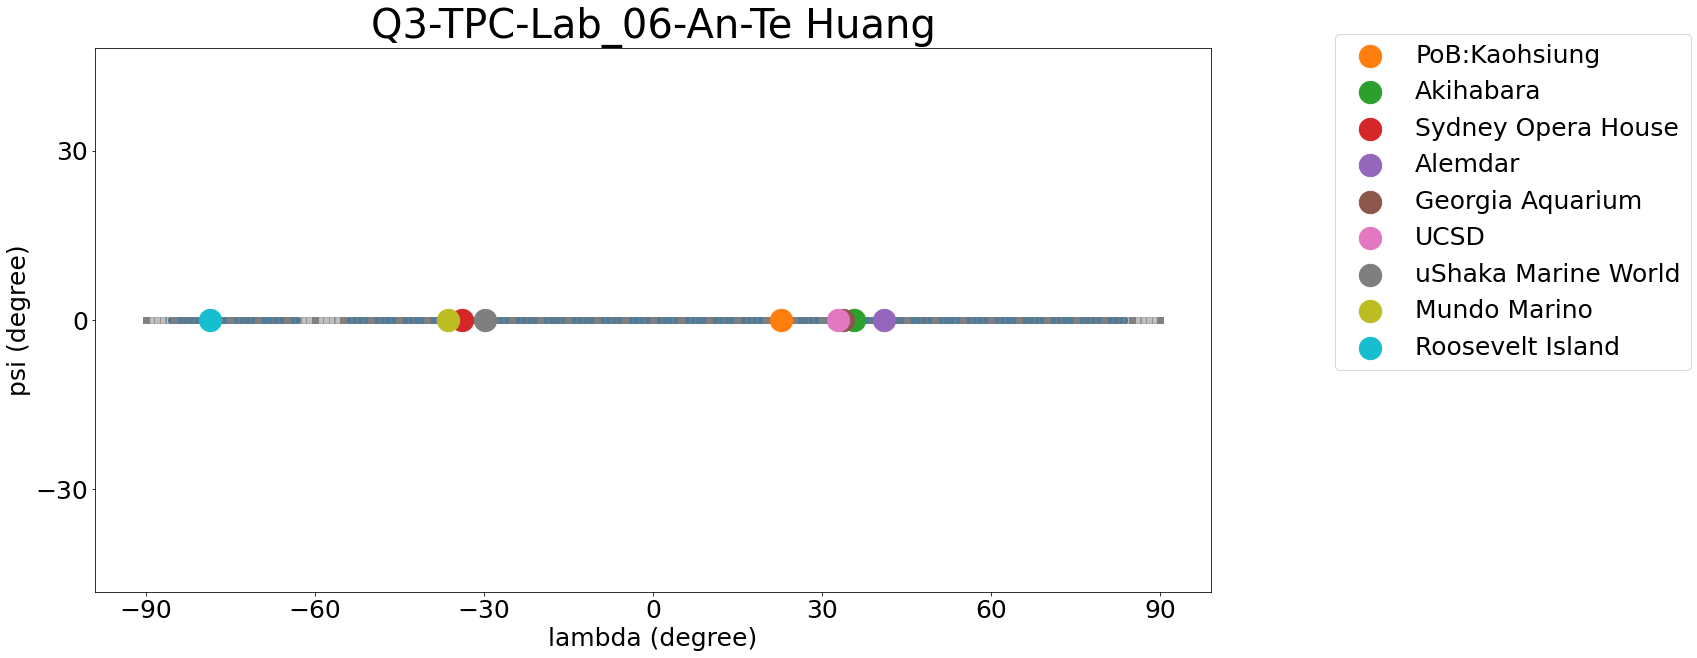

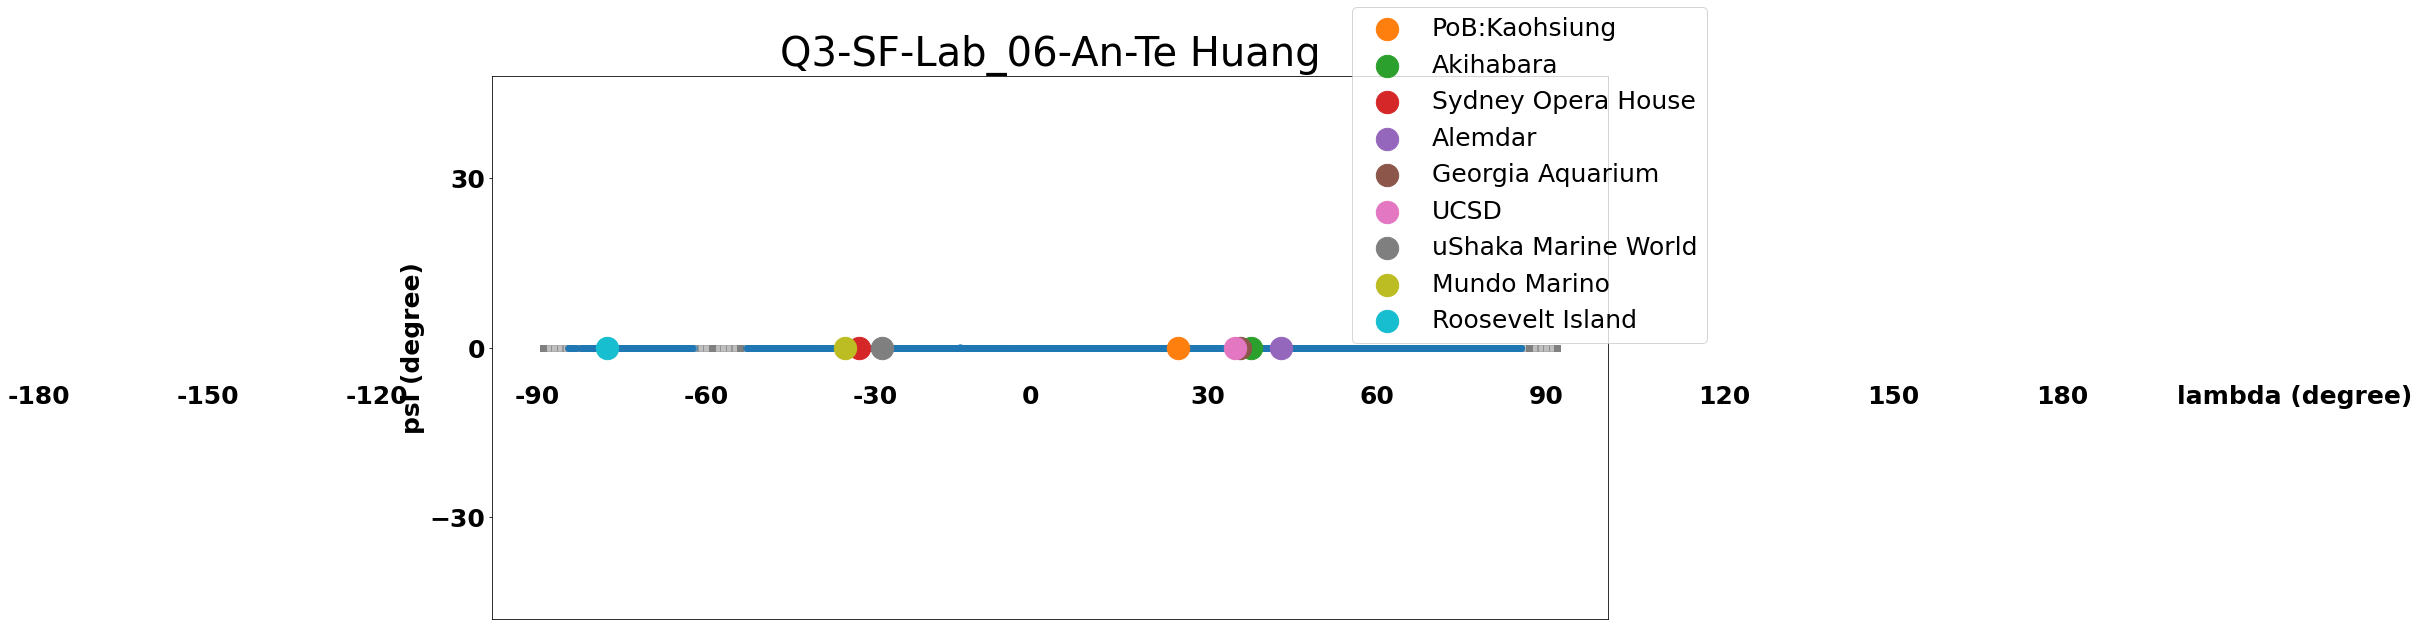

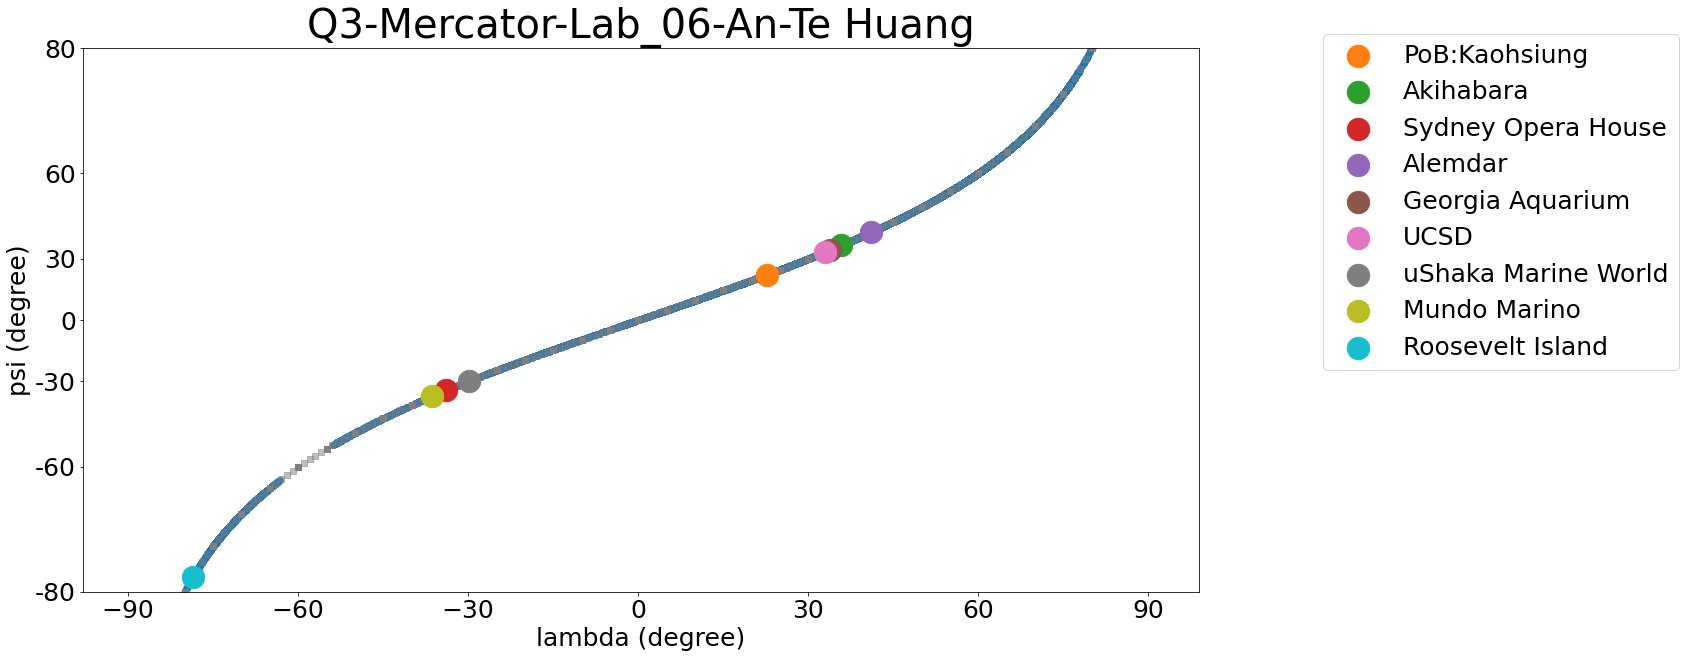

In [96]:

# plot Plate Carree
f1=plt.figure(figsize=(20,10))
plt.axis('equal')
plt.title('Q3-TPC-Lab_06-An-Te Huang',fontsize=40)
plt.xlabel('lambda (degree)',fontsize=25)
plt.yticks([-90,-60,-30,0,30,60,90],fontsize=25)
plt.xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],fontsize=25)
plt.ylabel('psi (degree)',fontsize=25)
plt.scatter(coastline['Xm_tpc'],coastline['Ym_tpc'])
plt.scatter(grid['Xm_tpc'],grid['Ym_tpc'],marker=',',color='gray',alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_tpc'][i],poi['Ym_tpc'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()

## plot SF
f2=plt.figure(figsize=(20,10))
plt.axis('equal')
plt.title('Q3-SF-Lab_06-An-Te Huang',fontsize=40)
# plt.xlabel('lambda (degree)',fontsize=25)
plt.xticks([])
Xw=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
Yw=[0 for i in range(len(Xw))]
for i in range(len(Xw)):
               plt.text(Xw[i]-5,Yw[i]-10,int(Xw[i]), fontsize=25,fontweight='bold')
plt.text(200,-10,'lambda (degree)', fontsize=25,fontweight='bold')
plt.yticks([-90,-60,-30,0,30,60,90],fontsize=25,fontweight='bold')
plt.ylabel('psi (degree)',fontsize=25,fontweight='bold')
plt.scatter(grid['Xm_tsf'],grid['Ym_tsf'],marker=',',color='gray',alpha=0.5)
plt.scatter(coastline['Xm_tsf'],coastline['Ym_tsf'], alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_tsf'][i],poi['Ym_tsf'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.15],fontsize=25)
plt.show()
# M
#compute q when psi =-80 and 80
ql=ln(np.tan(np.deg2rad(-80)/2+np.pi/4))
qt=ln(np.tan(np.deg2rad(80)/2+np.pi/4))
yticks=[-80,-60,-30,0,30,60,80]
labels=(-80,-60,-30,0,30,60,80)
qticks=[]
for i in range(7):
    angle_temp=np.deg2rad(yticks[i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    qticks.append(Ymm)
f3=plt.figure(figsize=(20,10))
# plt.axis('equal')
plt.title('Q3-Mercator-Lab_06-An-Te Huang',fontsize=40)
plt.ylim(ql,qt)
plt.rcParams['figure.figsize'] = [15, 18]

plt.xlabel('lambda (degree)',fontsize=25)
plt.yticks(qticks,labels,fontsize=25)
plt.xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],fontsize=25)
plt.ylabel('psi (degree)',fontsize=25)
plt.scatter(coastline['Xm_tm'],coastline['Ym_tm'])
plt.scatter(grid['Xm_tm'],grid['Ym_tm'],marker=',',color='gray',alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_tm'][i],poi['Ym_tm'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()

In [102]:
deg2xyz(R,0,15,120)

(-3076956.7196438257, 5329445.371113575, 1648936.1363481595)

In [104]:
transverse(120,-3076956.7196438257, 5329445.371113575, 1648936.1363481595)

array([[6153913.43928765],
       [1648936.13634816],
       [      0.        ]])

In [105]:
xyz2deg(6153913.43928765,1648936.13634816,0)

[-3.725290298461914e-09, 15.000000000000012, 0.0]